In [58]:
import pandas as pd
import datetime as dt

In [2]:
df=pd.read_csv('online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240007 entries, 0 to 240006
Data columns (total 8 columns):
InvoiceNo      240007 non-null object
StockCode      240007 non-null object
Description    239106 non-null object
Quantity       240007 non-null int64
InvoiceDate    240007 non-null object
UnitPrice      240007 non-null float64
CustomerID     172782 non-null float64
Country        240007 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 14.6+ MB


In [4]:
df.nunique()

InvoiceNo      12468
StockCode       3645
Description     3617
Quantity         477
InvoiceDate    11240
UnitPrice       1053
CustomerID      2974
Country           38
dtype: int64

In [15]:
df[(df['Quantity']>0)&(df['Quantity']<100)].groupby('Quantity')[['CustomerID']].count()

,CustomerID
Quantity,
1,29452
2,25144
3,11443
4,13242
5,3375
...,...
95,0
96,840
97,0


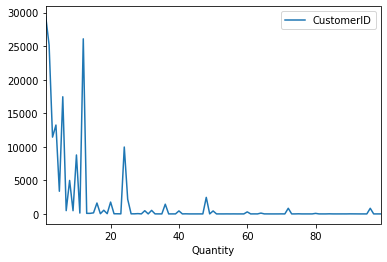

In [17]:
df[(df['Quantity']>0)&(df['Quantity']<100)].groupby('Quantity')[['CustomerID']].count().plot()

In [28]:
df['StockNum']=df['StockCode'].apply(lambda x: x[:1])
df.groupby('StockNum')[['CustomerID']].count().sort_values(by='CustomerID')

,CustomerID
StockNum,
m,0
S,0
g,0
A,0
B,4
D,35
C,60
6,70
5,140


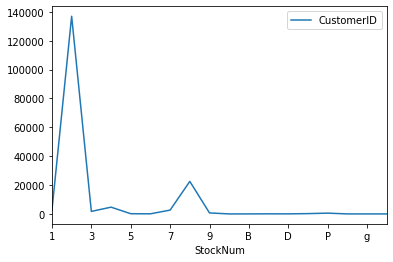

In [29]:
df.groupby('StockNum')[['CustomerID']].count().plot()

In [30]:
df['StockLet']=df['StockCode'].apply(lambda x: x[-1:])
df.groupby('StockLet')[['CustomerID']].count().sort_values(by='CustomerID')

,CustomerID
StockLet,
s,0
I,0
Z,0
O,0
b,0
c,0
d,0
a,0
f,0


In [32]:
df.InvoiceDate.max()

'6/9/11 9:54'

In [33]:
df.InvoiceDate.min()

'1/10/11 10:04'

In [34]:
df=pd.read_csv('orders-zakka.csv')
df

,Customer ID,Date,Subtotal,State,Country
0,34,6/21/2007,86.00,ON,Canada
1,38,6/27/2007,38.40,ON,Canada
2,47,7/2/2007,53.50,MO,United States
3,61,7/14/2007,7.00,ON,Canada
4,78,7/21/2007,55.50,ON,Canada
...,...,...,...,...,...
22403,15356,12/18/2015,31.87,NaN,Canada
22404,15357,12/18/2015,6.10,NaN,Canada
22405,15358,12/18/2015,153.23,NaN,Canada
22406,15359,12/19/2015,19.15,NaN,Canada


In [35]:
df.Date.max()

'9/9/2015'

In [36]:
df.Date.min()

'1/1/2009'

In [38]:
len(df)

22408

In [37]:
df.nunique()

Customer ID    12829
Date            2734
Subtotal        8951
State             50
Country           43
dtype: int64

In [43]:
df.groupby('Country')['Customer ID'].count().sort_values(ascending=False)

Country
Canada                  21733
United States             558
Australia                  29
United Kingdom             21
Belgium                     4
Germany                     4
Ireland                     4
Chile                       3
France                      3
India                       3
South Africa                2
Japan                       2
Switzerland                 2
Denmark                     2
France, Metropolitan        2
Sweden                      2
Italy                       2
Hong Kong                   2
American Samoa              2
Norway                      2
Dominican Republic          1
Trinidad and Tobago         1
Austria                     1
Barbados                    1
Thailand                    1
Cambodia                    1
Singapore                   1
Saudi Arabia                1
Croatia                     1
Cyprus                      1
Russian Federation          1
Mexico                      1
Netherlands                 1
Pu

In [44]:
df['CountryID']=df['Country'].apply(lambda x: 'Other' if x!='Canada' and x!='United States' else x)
df.groupby('CountryID')['Customer ID'].count().sort_values(ascending=False)

CountryID
Canada           21733
United States      558
Other              117
Name: Customer ID, dtype: int64

In [82]:
df['date']=pd.to_datetime(df['Date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['new_date']=df['date'].apply(lambda x: dt.datetime(2020,x.month,x.day))


In [57]:
df.groupby(['new_date','CountryID'])[['Customer ID']].count()

Customer ID
month CountryID                 
1     Canada                1379
      Other                   10
      United States           42
2     Canada                1466
      Other                   10
      United States           54
3     Canada                1719
      Other                    4
      United States           59
4     Canada                1872
      Other                   14
      United States           45
5     Canada                1681
      Other                    9
      United States           47
6     Canada                1641
      Other                    9
      United States           27
7     Canada                1482
      Other                    9
      United States           37
8     Canada                1829
      Other                    8
      United States           51
9     Canada                2039
      Other                   12
      United States           53
10    Canada                2537
      Other                   14
      United States           43
11    Canada                2674
      Other                   10
      United States           48
12    Canada                1414
      Other                    8
      United States           52

In [63]:
df['new_customer']=df['Customer ID'].apply(lambda x: x%100)

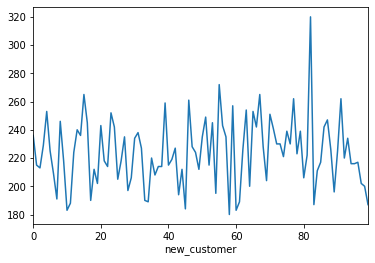

In [65]:
df.groupby('new_customer')['Customer ID'].count().plot()

In [71]:
df.groupby('Customer ID')['Date'].min()

Customer ID
7         12/9/2012
9         8/13/2007
30         9/7/2007
34        6/21/2007
38        6/27/2007
            ...    
15356    12/18/2015
15357    12/18/2015
15358    12/18/2015
15359    12/19/2015
15360    12/19/2015
Name: Date, Length: 12829, dtype: object

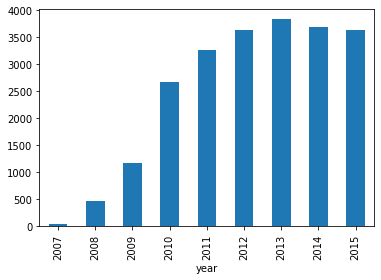

In [72]:
df.groupby('year')['Customer ID'].count().plot(kind='bar')

In [79]:
df['new_customer']=df['Customer ID'].apply(lambda x: x-x%10)

In [76]:
df.groupby('new_customer')['Date'].min().min()

'1/1/2009'

In [86]:
df.groupby('new_customer')['date'].min().min()

Timestamp('2007-06-21 00:00:00')

In [80]:
df['new_customer'].nunique()

1530

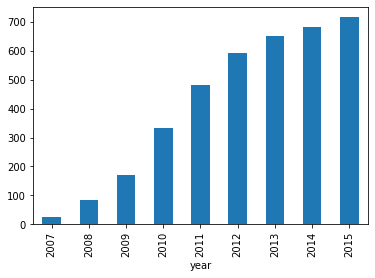

In [96]:
df.groupby('year')['new_customer'].nunique().plot(kind='bar')

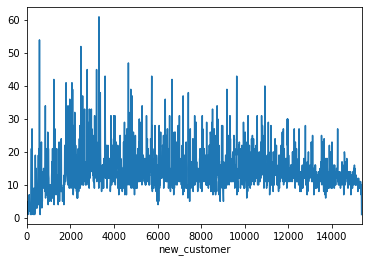

In [89]:
df.groupby('new_customer')['Customer ID'].count().plot()

In [95]:
df.groupby('new_customer')[['CountryID']].nunique().reset_index().groupby('CountryID')['new_customer'].count()

CountryID
1    1081
2     415
3      34
Name: new_customer, dtype: int64

In [104]:
df['Subtotal'].min()

2.45

## Spot the lion data

In [211]:
df=pd.read_csv('orders-zakka.csv')
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')
df=df[df['Date']>dt.datetime(2009,12,31)]
df=df.drop(['State'],axis=1)
df.head()

,Customer ID,Date,Subtotal,Country
1676,2394,2010-01-02,220.01,United States
1677,2397,2010-01-04,18.14,Canada
1678,2398,2010-01-04,1.80,United States
1679,2245,2010-01-04,94.55,Canada
1680,2400,2010-01-05,96.86,Canada


In [212]:
df['user_id']=df['Customer ID'].apply(lambda x: int((x-x%10)/10+1))
df['revenue']=df['Subtotal'].fillna(0)
df['action']=df['Country'].apply(lambda x: 'Take a look' if x=='Canada' else ('Confirm' if x=='United States' else 'Spot'))
df=df.drop(['Customer ID','Subtotal','Country'],axis=1)
df

,Date,user_id,revenue,action
1676,2010-01-02,240,220.01,Confirm
1677,2010-01-04,240,18.14,Take a look
1678,2010-01-04,240,1.80,Confirm
1679,2010-01-04,225,94.55,Take a look
1680,2010-01-05,241,96.86,Take a look
...,...,...,...,...
22403,2015-12-18,1536,31.87,Take a look
22404,2015-12-18,1536,6.10,Take a look
22405,2015-12-18,1536,153.23,Take a look
22406,2015-12-19,1536,19.15,Take a look


In [213]:
def new_date(date):
    if date.year==2010:
        if date.month<7:
            return dt.datetime(2020,1,date.day)
        else:
            return dt.datetime(2020,2,date.day%29+1)
    elif date.year==2011:
        if date.month<7:
            return dt.datetime(2020,3,date.day)
        else:
            return dt.datetime(2020,4,date.day%30+1)
    elif date.year==2012:
        if date.month<7:
            return dt.datetime(2020,5,date.day)
        else:
            return dt.datetime(2020,6,date.day%30+1)
    elif date.year==2013:
        if date.month<7:
            return dt.datetime(2020,7,date.day)
        else:
            return dt.datetime(2020,8,date.day)
    elif date.year==2014:
        if date.month<7:
            return dt.datetime(2020,9,date.day%30+1)
        else:
            return dt.datetime(2020,10,date.day)
    else:
        if date.month<7:
            return dt.datetime(2020,11,date.day%30+1)
        else:
            return dt.datetime(2020,12,date.day)


df['date']=df['Date'].apply(lambda x: new_date(x))
df=df.drop(['Date'],axis=1)

In [214]:
df=df.sort_values('date').reset_index().drop(['index'],axis=1)
df

,user_id,revenue,action,date
0,296,34.50,Confirm,2020-01-01
1,312,22.37,Take a look,2020-01-01
2,312,571.78,Take a look,2020-01-01
3,312,85.60,Take a look,2020-01-01
4,312,276.79,Take a look,2020-01-01
...,...,...,...,...
20727,1459,377.59,Take a look,2020-12-31
20728,1451,56.34,Take a look,2020-12-31
20729,1088,21.98,Take a look,2020-12-31
20730,1473,47.29,Take a look,2020-12-31


In [215]:
df[['date','user_id','action']].to_csv('spot_the_lion_user_activity.csv',index=False)

In [216]:
pd.read_csv('spot_the_lion_user_activity.csv')

,date,user_id,action
0,2020-01-01,296,Confirm
1,2020-01-01,312,Take a look
2,2020-01-01,312,Take a look
3,2020-01-01,312,Take a look
4,2020-01-01,312,Take a look
...,...,...,...
20727,2020-12-31,1459,Take a look
20728,2020-12-31,1451,Take a look
20729,2020-12-31,1088,Take a look
20730,2020-12-31,1473,Take a look


In [217]:
df.head()

,user_id,revenue,action,date
0,296,34.50,Confirm,2020-01-01
1,312,22.37,Take a look,2020-01-01
2,312,571.78,Take a look,2020-01-01
3,312,85.60,Take a look,2020-01-01
4,312,276.79,Take a look,2020-01-01


In [218]:
rev_df=df.drop(['action'],axis=1).groupby(['user_id','date'])[['revenue']].sum().apply(lambda x: (x*100)%10000/100).reset_index()

In [219]:
rev_df=rev_df[rev_df['revenue']>20]
rev_df

,user_id,date,revenue
4,8,2020-04-28,23.96
5,8,2020-10-05,23.39
7,10,2020-01-08,21.93
8,12,2020-04-07,27.24
9,12,2020-04-15,94.30
...,...,...,...
12097,1534,2020-12-16,47.23
12098,1535,2020-12-16,75.65
12099,1535,2020-12-17,77.87
12100,1536,2020-12-18,54.22


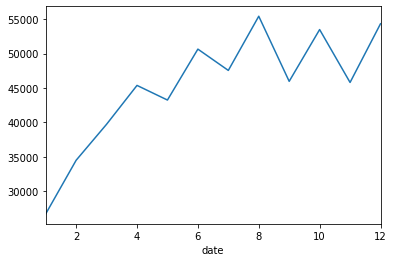

In [220]:
rev_df.groupby(rev_df['date'].dt.month)['revenue'].sum().plot()

In [221]:
df.sort_values('date')[['date','user_id','revenue']]

,date,user_id,revenue
0,2020-01-01,296,34.50
27,2020-01-01,172,45.99
26,2020-01-01,250,106.84
25,2020-01-01,279,57.50
24,2020-01-01,279,77.07
...,...,...,...
20706,2020-12-31,1508,38.31
20705,2020-12-31,478,122.94
20704,2020-12-31,1509,14.02
20716,2020-12-31,1233,65.20


In [222]:
df.sort_values('date')[['date','user_id','revenue']].to_csv('spot_the_lion_revenue.csv',index=False)

In [163]:
df.groupby('action')['user_id'].count()

action
Confirm          405
Spot              72
Take a look    20255
Name: user_id, dtype: int64

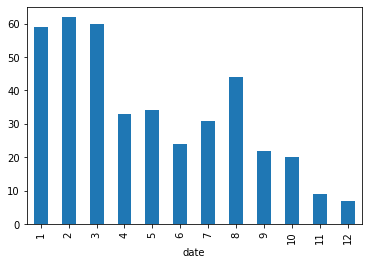

In [166]:
df[df['action']=='Confirm'].groupby(df['date'].dt.month)['action'].count().plot(kind='bar')